In [34]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import linear_model
%matplotlib inline

In [35]:
# Import high frequency data

path =r'D:\data_raw' # Please put all .csv documents into one folder
company_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'DWDP', 'GE', 'GS', \
                           'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', \
                            'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM' ] # Input company name as a list
company_data = {} # Store company data as a dictionary: {company_name1: data1, company_name2: data2, ...}
for company in company_list:
    frame = pd.DataFrame()
    list_ = []
    allFiles = glob.glob(path + '/' +company +'_' + '*.csv')
    allFiles.reverse()
    #print (allFiles)
    for file_ in allFiles:
        df = pd.read_csv(file_, index_col=None, header=0, usecols=[0,1], skiprows=[1,])
        list_.append(df)
    frame = pd.concat(list_)
    company_data[company] = frame
    company_data[company].index = pd.RangeIndex(len(company_data[company].index))

In [ ]:
high_mom_daily_data = {}
for com in company_data.keys():
    list_temp = []
    date_idx = []
    high_mom_daily_data[com] = pd.DataFrame(columns = ['RDVar', 'RDSkew', 'RDKurt'])
    date_idx_s = np.array(company_data[com].loc[pd.isnull(company_data[com].Close), ].index)
    date_idx_e = np.append(date_idx_s[1:], company_data[com].shape[0])
    for i, j in zip(date_idx_s, date_idx_e):
        date_idx.append(company_data[com]['Time Interval'][i][:9])
        log_r = np.log(company_data[com].Close[i+1: j]).diff().dropna()
        RDVar = np.sum(np.square(log_r))
        RDSkew = np.sqrt(len(log_r)) * np.sum(log_r**3) / RDVar**1.5
        RDKurt = len(log_r) * np.sum(log_r**4) / RDVar**2
        list_temp.append({'RDVar': RDVar, 'RDSkew': RDSkew, 'RDKurt': RDKurt})
    high_mom_daily_data[com] = high_mom_daily_data[com].append(list_temp)
    high_mom_daily_data[com].index = date_idx

In [61]:
# Import daily data

path_ = r'D:\daily_data'
company_daily = {}
for com in company_list:
    file = glob.glob(path_ + '/' +com + '*.csv')[0]
    company_daily[com] = pd.read_csv(file, index_col = None, header = 0, usecols=[6])
    company_daily[com]['Daily_logp'] = np.log(company_daily[com].iloc[:, 0])
    company_daily[com]['Daily_logr'] = company_daily[com]['Daily_logp'].diff()
    company_daily[com].index = high_mom_daily_data['AAPL'].index

In [9]:
# Import DJIA daily
DJIA = pd.read_csv('D:\daily_data\DJI_daily.csv', index_col = None, header = 0, usecols=[6])
DJIA.index = high_mom_daily_data['AAPL'].index

In [69]:
# Delete two dates
date_to_delete = ['13AUG2013', '12SEP2016']
for com in high_mom_daily_data.keys():
    if date_to_delete[0] in high_mom_daily_data[com].index:
        high_mom_daily_data[com].drop(date_to_delete[0], inplace = True)
    if date_to_delete[0] in company_daily[com].index:
        company_daily[com].drop(date_to_delete[0], inplace = True)
    if date_to_delete[0] in DJIA.index:
        DJIA.drop(date_to_delete[0], inplace = True)
    if date_to_delete[1] in high_mom_daily_data[com].index:
        high_mom_daily_data[com].drop(date_to_delete[1], inplace = True)
    if date_to_delete[1] in company_daily[com].index:
        company_daily[com].drop(date_to_delete[1], inplace = True)
    if date_to_delete[1] in DJIA.index:
        DJIA.drop(date_to_delete[1], inplace = True)

In [73]:
# Combine two dataframes
for com in high_mom_daily_data.keys():
    high_mom_daily_data[com]['DR'] = company_daily[com].Daily_logr
    print (com, high_mom_daily_data[com].shape)

AAPL (1255, 4)
AXP (1255, 4)
BA (1255, 4)
CAT (1255, 4)
CSCO (1255, 4)
CVX (1255, 4)
DIS (1255, 4)
DWDP (1255, 4)
GE (1255, 4)
GS (1255, 4)
HD (1255, 4)
IBM (1255, 4)
INTC (1255, 4)
JNJ (1255, 4)
JPM (1255, 4)
KO (1255, 4)
MCD (1255, 4)
MMM (1255, 4)
MRK (1255, 4)
MSFT (1255, 4)
NKE (1255, 4)
PFE (1255, 4)
PG (1255, 4)
TRV (1255, 4)
UNH (1255, 4)
UTX (1255, 4)
V (1255, 4)
VZ (1255, 4)
WMT (1255, 4)
XOM (1255, 4)


In [75]:
# Save data
for com in high_mom_daily_data.keys():
    high_mom_daily_data[com].to_csv('D:\\output_data\\'+com+'.csv')

In [15]:
# Construct weekly data (5 trading days a week)
weekly_data = {}
for com in reshaped_data.keys():
    weekly_data[com] = pd.DataFrame()
    weekly_data[com]['WR'] = reshaped_data[com]['DR'].rolling(5).sum()[4::5]
    weekly_data[com]['RVol'] = np.sqrt(252.*reshaped_data[com]['RDVar'].rolling(5).mean()[4::5])
    weekly_data[com]['RSkew'] = reshaped_data[com]['RDSkew'].rolling(5).mean()[4::5]
    weekly_data[com]['RKurt'] = reshaped_data[com]['RDKurtosis'].rolling(5).mean()[4::5]

In [16]:
# Reset all the indices of dataframes to start from 0
for com in weekly_data.keys():
    weekly_data[com].index = pd.RangeIndex(len(weekly_data[com].index))

In [17]:
# Split weekly data into train and test data
weekly_test_data = {}
for com in weekly_data.keys():
    weekly_test_data[com] = weekly_data[com][-50: ]
    weekly_data[com] = weekly_data[com][:-50]

In [18]:
weekly_data['AAPL'].shape

(201, 4)

In [19]:
weekly_test_data['AAPL'].shape

(50, 4)

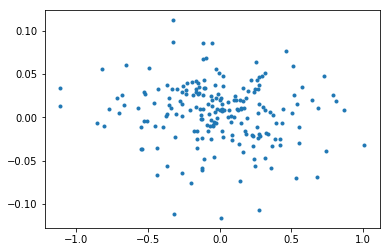

In [20]:
plt.plot(weekly_data['AAPL'].RSkew[:-1], weekly_data['AAPL'].WR[1:], '.')

In [93]:
weekly_data['XOM'].head()

,WR,RVol,RSkew,RKurt
0,NaN,0.073274,1.201329,7.316593
1,-0.004384,0.072595,0.186918,4.744715
2,0.002812,0.064835,0.235284,4.741607
3,0.017373,0.108490,-0.054752,3.301208
4,-0.020185,0.094243,-0.354170,4.028046


In [92]:
total_week = weekly_data['AAPL'].shape[0]

In [167]:
total_tday = reshaped_data['AAPL'].shape[0]

In [171]:
total_tday

1257

In [96]:
from statsmodels.api import add_constant

In [154]:
a = [1,2,3]
b = [-1,-2,-3]
np.corrcoef(a,b)[0,1]

-1.0

In [169]:
reshaped_data['AAPL'].head()

,09:35 - 09:40,09:40 - 09:45,09:45 - 09:50,09:50 - 09:55,09:55 - 10:00,10:00 - 10:05,10:05 - 10:10,10:10 - 10:15,10:15 - 10:20,10:20 - 10:25,...,15:30 - 15:35,15:35 - 15:40,15:40 - 15:45,15:45 - 15:50,15:50 - 15:55,15:55 - 16:00,DR,RDVar,RDSkew,RDKurtosis
0,0.002817,-0.000975,-0.001386,0.000716,0.001755,-0.000910,-0.000976,-0.000651,0.000651,-0.000195,...,0.000065,0.000716,0.000033,0.001008,-0.000143,-0.000377,NaN,0.000049,-0.034297,5.451433
1,0.000970,-0.001746,0.001811,-0.002226,-0.000557,0.001554,-0.000906,-0.002075,0.001038,0.000583,...,0.000129,0.000259,0.000000,-0.000971,-0.000389,0.000777,-0.012792,0.000039,-0.493605,4.409002
2,-0.000521,-0.001434,0.000228,-0.000555,0.001988,-0.000287,-0.001278,0.000033,-0.000750,-0.000882,...,0.000033,0.000587,-0.000130,0.000847,-0.000723,0.000339,0.011492,0.000033,0.197202,3.409307
3,-0.000310,0.001020,0.001547,0.000419,-0.002095,0.000581,0.000677,0.000387,-0.000161,-0.000354,...,0.000412,0.000425,-0.000257,-0.000097,-0.000322,0.000740,0.002644,0.000033,-0.399728,3.941852
4,-0.000387,-0.001677,-0.000194,-0.000588,-0.000123,0.001227,0.000452,-0.000129,-0.001065,0.001065,...,-0.000258,0.000355,0.000032,0.000387,0.000258,0.000644,0.014145,0.000024,-0.041219,3.185754


In [180]:
reshaped_data['V']

,09:35 - 09:40,09:40 - 09:45,09:45 - 09:50,09:50 - 09:55,09:55 - 10:00,10:00 - 10:05,10:05 - 10:10,10:10 - 10:15,10:15 - 10:20,10:20 - 10:25,...,15:30 - 15:35,15:35 - 15:40,15:40 - 15:45,15:45 - 15:50,15:50 - 15:55,15:55 - 16:00,DR,RDVar,RDSkew,RDKurtosis
0,0.001908,0.001414,0.001553,-0.001145,0.002414,-0.002418,-0.001009,-0.001008,0.000402,0.000000,...,0.000203,-0.000304,0.000304,0.000608,0.000203,0.000405,NaN,0.000043,0.141053,4.906572
1,0.001616,-0.000202,-0.000101,0.002117,-0.000201,-0.000605,0.000806,0.003017,0.003699,-0.000204,...,0.001004,0.000000,0.000301,-0.000502,-0.000201,0.001103,-0.008634,0.000064,1.522844,6.760398
2,0.006252,0.000804,0.000402,0.003122,-0.000114,-0.000801,0.000467,0.000935,0.000200,0.000380,...,0.000301,0.000000,0.001404,-0.000401,0.000000,0.000602,0.004221,0.000085,2.942287,18.121819
3,0.000000,0.000400,0.000600,0.000600,-0.001401,-0.001202,0.000401,-0.000802,-0.000903,0.001504,...,0.000101,0.000402,0.000000,0.001306,-0.000502,0.000301,0.010059,0.000037,0.073535,2.351521
4,-0.002039,-0.001737,0.001737,0.001835,-0.000204,-0.000128,-0.000483,-0.000408,0.000306,-0.000306,...,-0.000788,-0.000440,0.000000,0.000000,-0.000410,-0.000512,-0.003132,0.000047,-0.092818,4.752065
5,-0.002358,0.000308,-0.001335,0.003897,-0.000137,0.001467,-0.000159,0.001692,0.000429,-0.000408,...,0.000693,-0.000612,0.000204,-0.000408,0.001427,-0.000306,0.011438,0.000043,1.672384,12.167299
6,0.004063,0.000709,0.001518,0.001011,-0.000606,-0.000910,-0.001247,0.000235,-0.000304,0.000405,...,-0.000407,-0.000407,0.000102,0.001323,-0.000102,-0.001221,-0.008723,0.000067,1.283193,6.675432
7,0.000203,-0.000507,0.000304,-0.001929,-0.000915,-0.000407,0.001094,0.000126,-0.000205,-0.000201,...,0.000000,0.000000,0.000102,-0.000102,0.000410,0.000819,0.011201,0.000068,-1.315214,7.246908
8,-0.004916,0.003935,-0.002794,0.003414,-0.000827,-0.000620,0.003820,0.001030,0.003083,0.001282,...,0.000207,0.000622,-0.000414,0.000000,0.000000,0.001553,-0.009533,0.000128,0.160879,6.578693
9,-0.003227,0.000521,0.000281,-0.001220,0.001251,0.002912,0.005180,0.001446,-0.004069,0.001073,...,-0.001145,-0.000104,-0.000417,-0.000417,-0.001045,-0.000207,0.015087,0.000122,0.408755,6.938553


In [179]:
for com in reshaped_data.keys():
    print(reshaped_data[com].DR.shape)

(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1257,)
(1256,)
(1256,)
(1257,)
(1257,)
(1257,)
(1256,)
(1257,)
(1257,)
(1257,)
(1256,)
(1257,)
(1257,)
(1257,)
(1257,)
(2514,)
(1257,)
(1257,)
(1257,)


In [175]:
for com in reshaped_data.keys():
    print(reshaped_data[com].DR[1256])

-0.00151470677494
-0.0210064039406
-0.00668647735734
-0.0419827394285
-0.00578941719471
-0.0149872268965
-0.0164402966653
-0.028881832856
-0.0272648835618
-0.01603475193
-0.0147585693702
-0.0046097846436


KeyError: 1256

In [172]:
# Cross sectional regression
#company_beta_pval = pd.DataFrame(columns = ['vol_intercept', 'b_vol', 'vol_p_val', 'skew_intercept', 'b_skew', \
#                                                                                'skew_p_val','kurt_intercept','b_kurt', 'kurt_p_val'])
daily_corr = pd.DataFrame(columns = ['vol_corrcoef', 'skew_corrcoef', 'kurt_corrcoef'])
list_dict = []
for day in range(total_tday-2):
    next_return =[]
    cur_vol = []
    cur_skew = []
    cur_kurt = []
    for com in reshaped_data.keys():
        next_return.append(reshaped_data[com].DR[day+1])
        cur_vol.append(reshaped_data[com].RDVar[day])
        cur_skew.append(reshaped_data[com].RDSkew[day])
        cur_kurt.append(reshaped_data[com].RDKurtosis[day])
    
    vol_corrcoef = np.corrcoef(cur_vol, next_return)[0,1]
    skew_corrcoef = np.corrcoef(cur_skew, next_return)[0,1]
    kurt_corrcoef = np.corrcoef(cur_kurt, next_return)[0,1]
    #cur_week_vol = add_constant(cur_week_vol)
    #cur_week_skew = add_constant(cur_week_skew)
    #cur_week_kurt = add_constant(cur_week_kurt)
    #lm_vol = sm.OLS(next_week_return, cur_week_vol).fit()
    #lm_skew = sm.OLS(next_week_return, cur_week_skew).fit()
    #lm_kurt = sm.OLS(next_week_return, cur_week_kurt).fit()
    
    #list_dict.append({'vol_intercept': lm_vol.params[0], 'b_vol': lm_vol.params[1], 'vol_p_val': lm_vol.pvalues[1], \
    #                             'skew_intercept': lm_skew.params[0], 'b_skew': lm_skew.params[1], 'skew_p_val': lm_skew.pvalues[1],\
    #                              'kurt_intercept': lm_kurt.params[0], 'b_kurt': lm_kurt.params[1], 'kurt_p_val': lm_kurt.pvalues[1]})
    list_dict.append({'vol_corrcoef': vol_corrcoef, 'skew_corrcoef': skew_corrcoef, 'kurt_corrcoef': kurt_corrcoef}) 
daily_corr = daily_corr.append(list_dict)

In [156]:
#company_beta_pval.dropna(inplace = True)

In [173]:
daily_corr

,vol_corrcoef,skew_corrcoef,kurt_corrcoef
0,0.162458,0.038409,-0.113642
1,0.137371,-0.187793,-0.179314
2,-0.265335,0.178950,0.081237
3,-0.033886,-0.217760,-0.174804
4,0.063039,-0.107331,0.119262
5,0.101116,-0.308790,-0.270748
6,0.024109,0.183334,-0.001889
7,-0.199509,0.370680,0.245075
8,0.204978,0.027873,-0.137829
9,-0.092062,-0.094884,-0.224767


In [164]:
sum(weekly_corr.kurt_corrcoef > 0)

94

In [159]:
company_beta_pval.mean()

vol_corrcoef     0.002362
skew_corrcoef    0.021950
kurt_corrcoef   -0.006053
dtype: float64

In [137]:
# stocks having significant beta1_vol
company_beta_pval[['vol_intercept','b_vol','vol_p_val']][company_beta_pval.vol_p_val <0.05]

,vol_intercept,b_vol,vol_p_val
13,-0.009017,0.138446,4.406898e-02
38,-0.055410,0.366216,8.704637e-03
55,0.068519,-0.356846,4.857019e-02
83,-0.009408,0.191237,4.732333e-02
84,0.057610,-0.274604,4.427244e-03
87,-0.031810,0.177961,2.417778e-02
99,0.020187,-0.160253,2.519151e-02
104,-0.059327,0.615657,4.086605e-04
105,-0.060999,0.375387,1.776572e-02
106,-0.055181,0.489987,3.404104e-02


In [138]:
# stocks having significant beta1_skew
company_beta_pval[['skew_intercept','b_skew','skew_p_val']][company_beta_pval.skew_p_val <0.05]

,skew_intercept,b_skew,skew_p_val
39,0.021937,0.027639,0.016982
41,-0.008493,-0.014040,0.038495
47,-0.002543,0.027689,0.001037
48,0.017787,-0.020874,0.013496
50,-0.023028,-0.025936,0.017094
59,-0.002100,-0.017288,0.047893
62,0.010083,0.021621,0.046279
63,-0.008134,0.022852,0.037438
68,0.001393,-0.029429,0.018385
74,-0.001457,-0.011985,0.039202


In [139]:
# Stocks having significant beta1_kurt
company_beta_pval[['kurt_intercept','b_kurt','kurt_p_val']][company_beta_pval.kurt_p_val <0.05]

,kurt_intercept,b_kurt,kurt_p_val
17,-0.036035,0.006143,0.002292
39,-0.008592,0.006554,0.017307
44,0.045970,-0.011040,0.014228
52,0.032263,-0.004746,0.027667
73,-0.006996,0.003244,0.013141
111,-0.021713,0.002471,0.041741
121,-0.036324,0.005706,0.018479
126,0.048930,-0.003315,0.032745
141,-0.046562,0.005205,0.009822
153,0.058709,-0.008172,0.000933


In [140]:
company_beta_pval.shape

(200, 9)

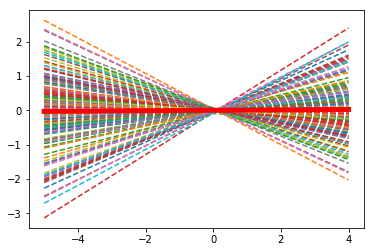

In [141]:
# Linear regression of return on vol
x = np.arange(-5,5)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.vol_intercept[row] + x*company_beta_pval.b_vol[row], '--')
plt.plot(x, company_beta_pval.vol_intercept.mean() + x*company_beta_pval.b_vol.mean(), color = 'red', lw = 5)
plt.show()

(array([  3.,   9.,  21.,  37.,  52.,  42.,  15.,  13.,   6.,   2.]),
 array([-0.51789343, -0.40453843, -0.29118343, -0.17782843, -0.06447343,
         0.04888157,  0.16223657,  0.27559157,  0.38894658,  0.50230158,
         0.61565658]),
 <a list of 10 Patch objects>)

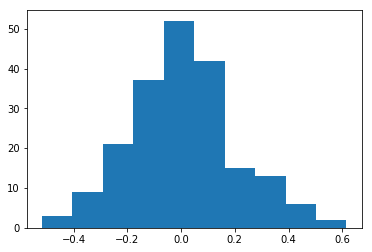

In [142]:
plt.hist(company_beta_pval.b_vol)

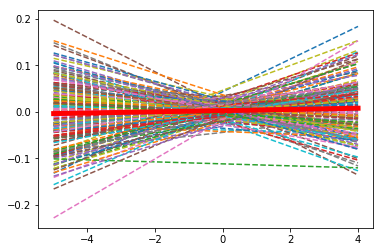

In [143]:
# Linear regression of return on skew
x = np.arange(-5,5)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.skew_intercept[row] + x*company_beta_pval.b_skew[row], '--')
plt.plot(x, company_beta_pval.skew_intercept.mean() + x*company_beta_pval.b_skew.mean(), color = 'red', lw = 5)
plt.show()

(array([  2.,   5.,  21.,  35.,  47.,  43.,  24.,  15.,   6.,   2.]),
 array([-0.03696308, -0.02903615, -0.02110922, -0.01318229, -0.00525536,
         0.00267157,  0.0105985 ,  0.01852543,  0.02645236,  0.03437929,
         0.04230622]),
 <a list of 10 Patch objects>)

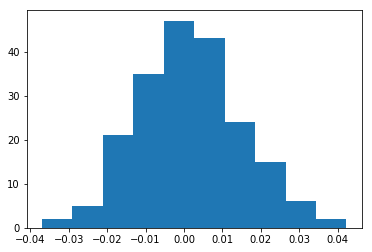

In [144]:
plt.hist(company_beta_pval.b_skew)

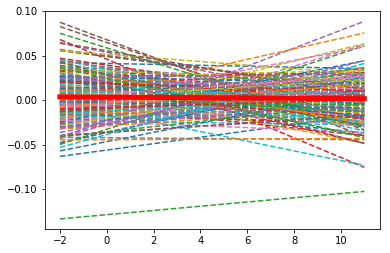

In [146]:
# Linear regression of return on kurt
x = np.arange(-2, 12)
for row in range(1, company_beta_pval.shape[0]):
    plt.plot(x, company_beta_pval.kurt_intercept[row] + x*company_beta_pval.b_kurt[row], '--')
plt.plot(x, company_beta_pval.kurt_intercept.mean() + x*company_beta_pval.b_kurt.mean(), color = 'red', lw = 5)
plt.show()

(array([  2.,   3.,  13.,  14.,  56.,  63.,  32.,   9.,   5.,   3.]),
 array([-0.01103956, -0.00892783, -0.00681609, -0.00470436, -0.00259263,
        -0.00048089,  0.00163084,  0.00374258,  0.00585431,  0.00796604,
         0.01007778]),
 <a list of 10 Patch objects>)

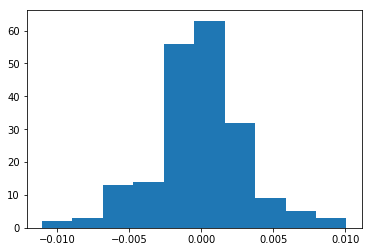

In [147]:
plt.hist(company_beta_pval.b_kurt)

In [39]:
weekly_data['AAPL'].head()

,WR,RVol,RSkew,RKurt
0,NaN,0.094435,-0.154330,4.079470
1,0.039957,0.097790,0.054424,5.149241
2,0.017100,0.103214,-0.197347,5.088467
3,-0.075682,0.118723,0.149588,3.637123
4,-0.006560,0.187124,-0.121788,5.357063


In [79]:
a = [(1,1), (2,3)]

In [80]:
b,c = zip(*a)
list(b)

[1, 2]

In [82]:
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_vol = pd.DataFrame(columns = group_name)
tmp_list = []
for week in range(total_week-1):
    vol_this_week = sorted([(com, weekly_data[com].RVol[week]) for com in weekly_data.keys()], key = lambda x: x[1])
    # print (vol_this_week)
    group_return_list = []
    for i in range(len(group_name)):
        cur_group, _ = zip(*vol_this_week[n_stock_grp*i : n_stock_grp*i+n_stock_grp])
        sum_r = 0
        for com in cur_group:
            sum_r += weekly_data[com].WR[week+1]
        group_return_list.append(sum_r/n_stock_grp)
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_vol = return_by_group_vol.append(tmp_list)

In [84]:
return_by_group_vol.sum()

group1    0.413853
group2    0.526152
group3    0.531461
dtype: float64

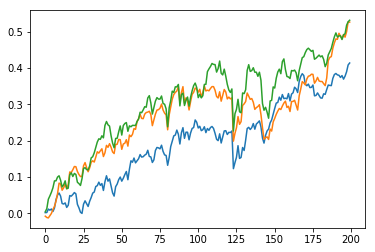

In [86]:
plt.plot(return_by_group_vol.group1.index, return_by_group_vol.group1.cumsum())
plt.plot(return_by_group_vol.group2.index, return_by_group_vol.group2.cumsum())
plt.plot(return_by_group_vol.group3.index, return_by_group_vol.group3.cumsum())

In [87]:
group_name = ['group1', 'group2', 'group3']
n_stock_grp = int(30/len(group_name))
return_by_group_skew = pd.DataFrame(columns = group_name)
tmp_list = []
for week in range(total_week-1):
    skew_this_week = sorted([(com, weekly_data[com].RSkew[week]) for com in weekly_data.keys()], key = lambda x: x[1])
    group_return_list = []
    for i in range(len(group_name)):
        cur_group = skew_this_week[n_stock_grp*i : n_stock_grp*i+n_stock_grp]
        sum_r = 0
        for com, _ in cur_group:
            sum_r += weekly_data[com].WR[week+1]
        group_return_list.append(sum_r/n_stock_grp)
    tmp_list.append(dict(zip(group_name, group_return_list)))
return_by_group_skew = return_by_group_skew.append(tmp_list)

In [88]:
n_stock_grp

10

In [89]:
return_by_group_skew.sum()

group1    0.363351
group2    0.558242
group3    0.549873
dtype: float64

In [90]:
return_by_group_skew.group1.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
           dtype='int64', length=200)

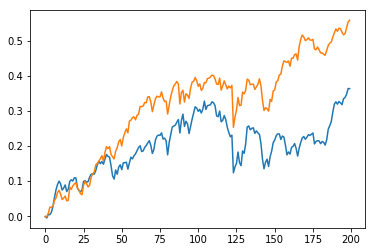

In [91]:
plt.plot(return_by_group_skew.group1.index, return_by_group_skew.group1.cumsum())
plt.plot(return_by_group_skew.group2.index, return_by_group_skew.group2.cumsum())
#plt.plot(return_by_group_skew.group3.index, return_by_group_skew.group3.cumsum())